In [35]:
# seaborn built on top of matplotlib, works well with Pandas dataframe objects
# conda install seaborn

In [ ]:
# SEABORN DISTRIBUTION PLOTS

In [1]:
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
tips = sns.load_dataset('tips')

In [4]:
# example dataframe from seaborn

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


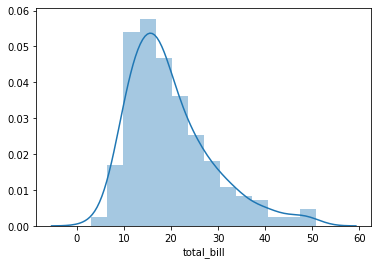

In [7]:
sns.distplot(tips['total_bill'])

In [8]:
# histogram (distribution of the total_bill) or KDE (Kernel Density Estimation)

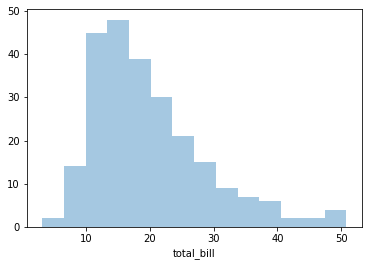

In [9]:
sns.distplot(tips['total_bill'], kde=False)

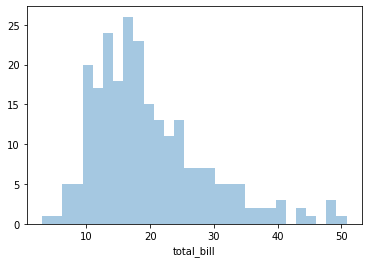

In [10]:
sns.distplot(tips['total_bill'], kde=False, bins=30)

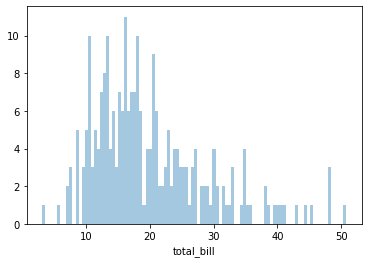

In [12]:
sns.distplot(tips['total_bill'], kde=False, bins=100)

ValueError: could not convert string to float: 'Female'

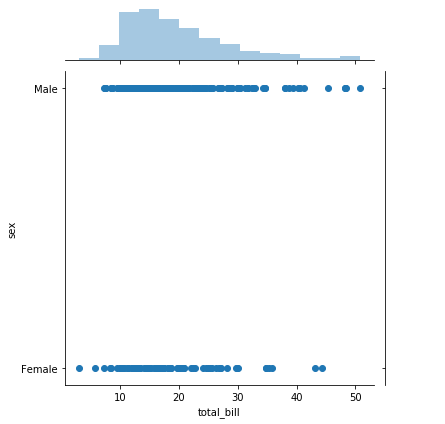

In [14]:
sns.jointplot(x='total_bill',y='sex',data=tips)

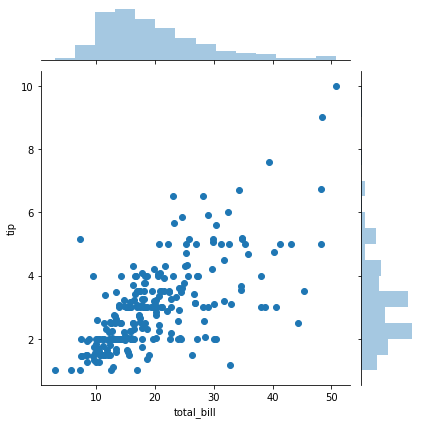

In [15]:
sns.jointplot(x='total_bill',y='tip',data=tips)

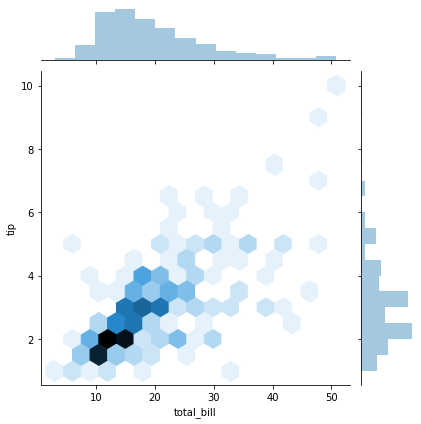

In [16]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

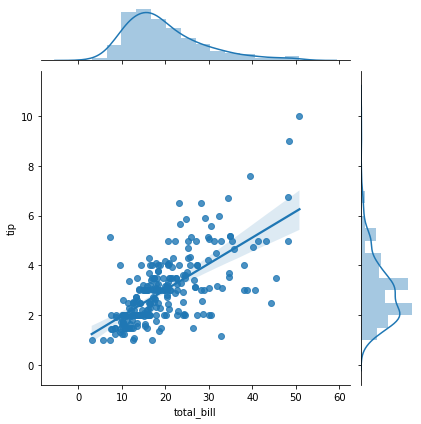

In [17]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

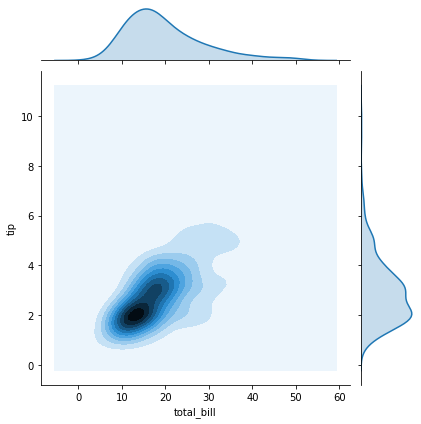

In [18]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='kde')

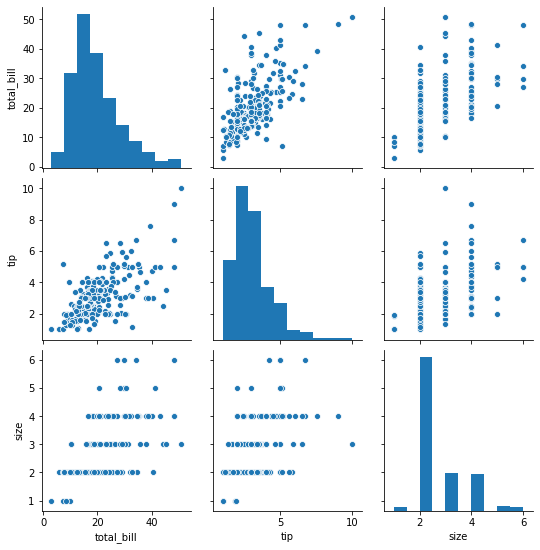

In [19]:
sns.pairplot(tips)

In [20]:
# pairplot() pairs (jointplot) all numerical data in a dataframe, in scatter plot, except self using histogram
# hue for categorical color, based on non-numeric value

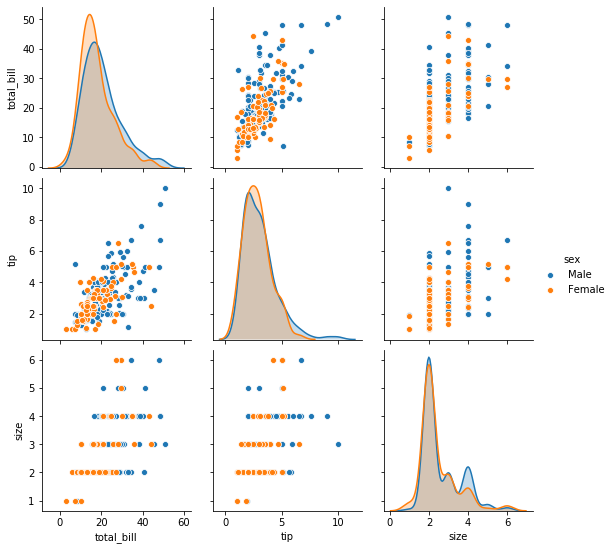

In [21]:
sns.pairplot(tips,hue='sex')

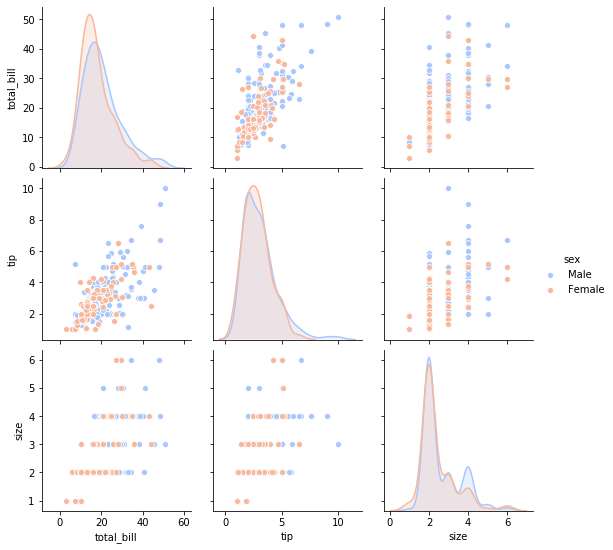

In [24]:
sns.pairplot(tips,hue='sex', palette='coolwarm')

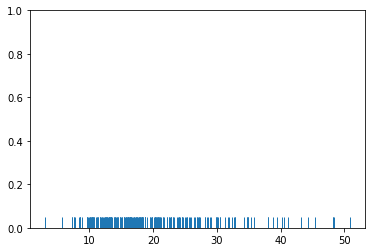

In [27]:
sns.rugplot(tips['total_bill'])

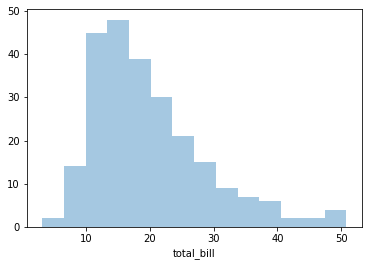

In [31]:
sns.distplot(tips['total_bill'], kde=False)

In [32]:
# histogram has bins, counts how many dashes in that bin, shows it as number on y
# the rugplot shows the dashes counts 
# KDE has relationship with rugplot and gaussian/normal distribution. 
# KDE is sum of normal dist on all rugplot dashes

(0, 1)

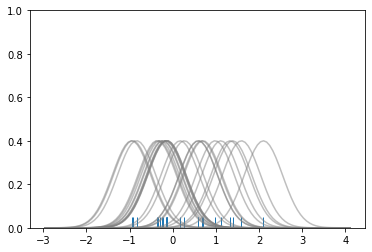

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

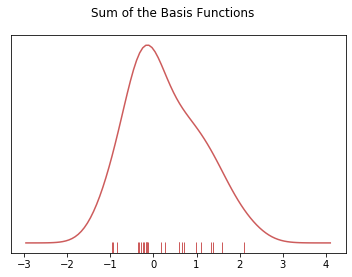

In [34]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

In [36]:
# to get KDE only without histogram

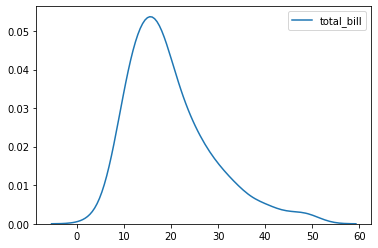

In [37]:
sns.kdeplot(tips['total_bill'])

In [38]:
# SEABORN CATEGORICAL PLOTS

In [39]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


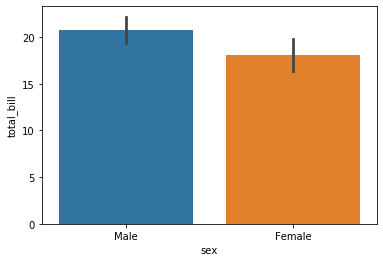

In [41]:
sns.barplot(x='sex',y='total_bill',data=tips)

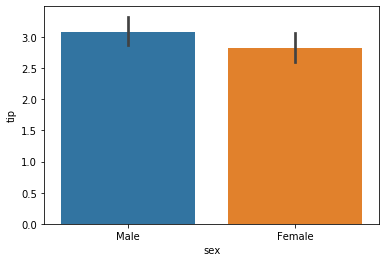

In [42]:
sns.barplot(x='sex',y='tip',data=tips)

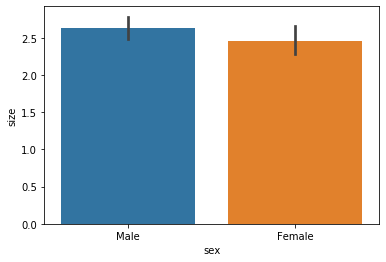

In [43]:
sns.barplot(x='sex',y='size',data=tips)

In [44]:
import numpy as np

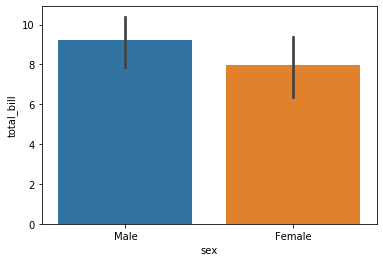

In [45]:
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std)

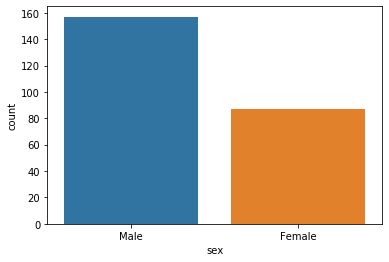

In [46]:
sns.countplot(x='sex',data=tips)

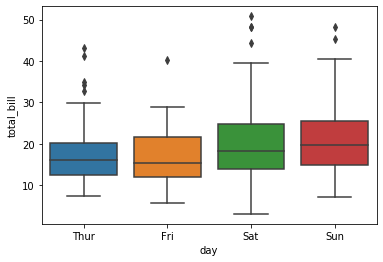

In [47]:
sns.boxplot(x='day', y='total_bill',data=tips)

In [49]:
# x categorical, y numeric
# box = core tiles, whiskers=rest of the distribution, outside whiskers: outliers

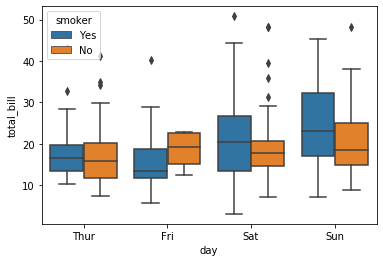

In [50]:
sns.boxplot(x='day', y='total_bill',data=tips, hue='smoker')

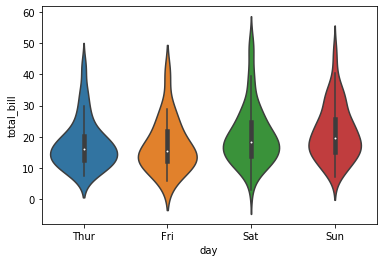

In [51]:
sns.violinplot(x='day', y='total_bill',data=tips)

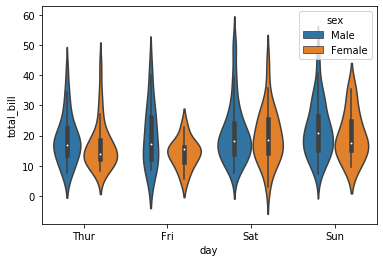

In [52]:
sns.violinplot(x='day', y='total_bill',data=tips, hue='sex')

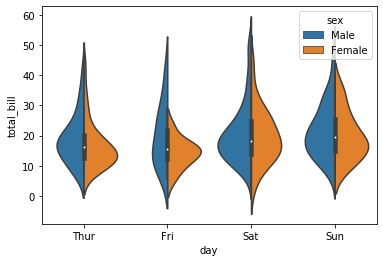

In [54]:
sns.violinplot(x='day', y='total_bill',data=tips, hue='sex', split=True)

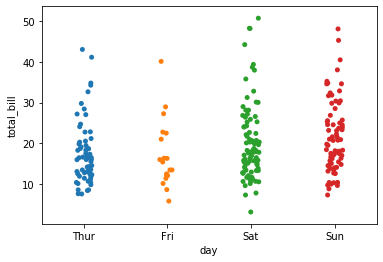

In [55]:
sns.stripplot(x='day', y='total_bill',data=tips)

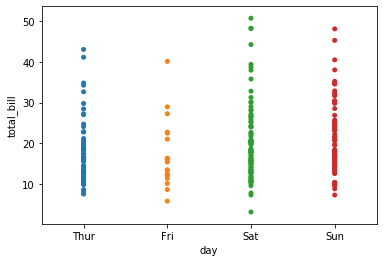

In [56]:
sns.stripplot(x='day', y='total_bill',data=tips, jitter=False)

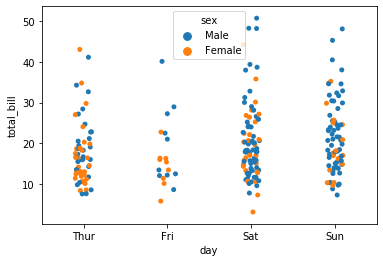

In [57]:
sns.stripplot(x='day', y='total_bill',data=tips, hue='sex')

/Users/sigitp/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:2784: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


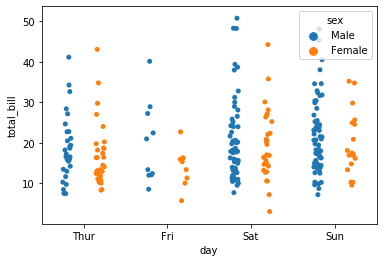

In [58]:
sns.stripplot(x='day', y='total_bill',data=tips, hue='sex', split=True)

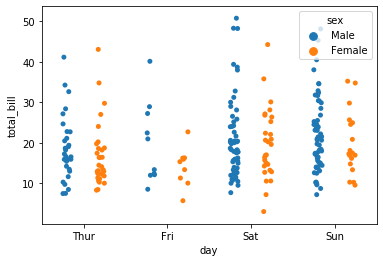

In [59]:
sns.stripplot(x='day', y='total_bill',data=tips, hue='sex', dodge=True)

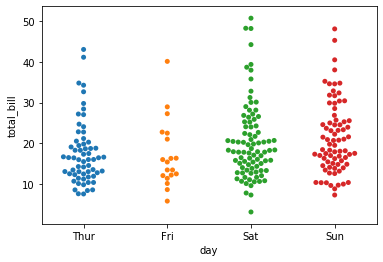

In [60]:
sns.swarmplot(x='day', y='total_bill',data=tips)

In [61]:
# swarmplot is combo of violin plot and strip plot

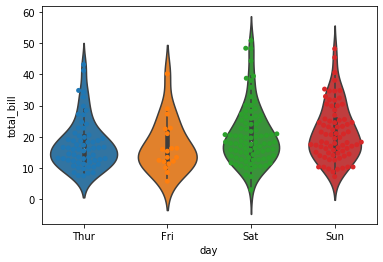

In [62]:
sns.violinplot(x='day', y='total_bill',data=tips)
sns.swarmplot(x='day', y='total_bill',data=tips)

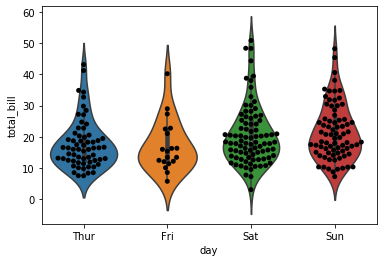

In [63]:
sns.violinplot(x='day', y='total_bill',data=tips)
sns.swarmplot(x='day', y='total_bill',data=tips, color='black')

/Users/sigitp/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


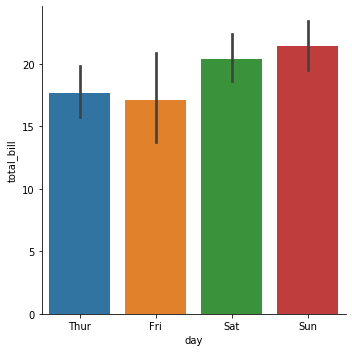

In [65]:
sns.factorplot(x='day', y='total_bill',data=tips, kind='bar')

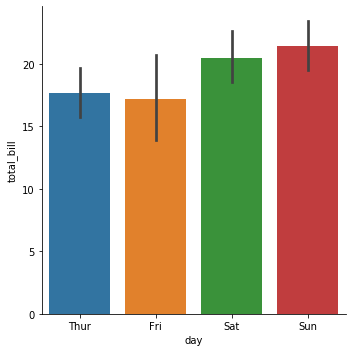

In [66]:
sns.catplot(x='day', y='total_bill',data=tips, kind='bar')

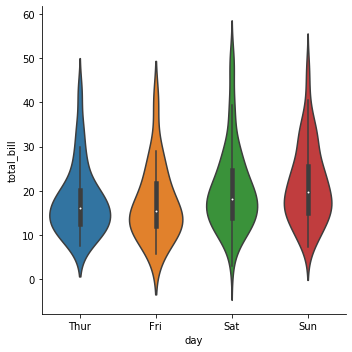

In [67]:
sns.catplot(x='day', y='total_bill',data=tips, kind='violin')

In [68]:
# SEABORN MATRIX PLOTS

In [69]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [70]:
flights = sns.load_dataset('flights')

In [71]:
flights

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
...,...,...,...
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390


In [76]:
# making matrix form of dataframe using corr() for a heatmap (matrix plot)

In [74]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


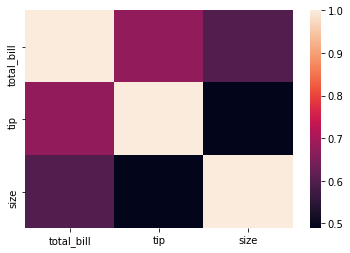

In [75]:
sns.heatmap(tips.corr())

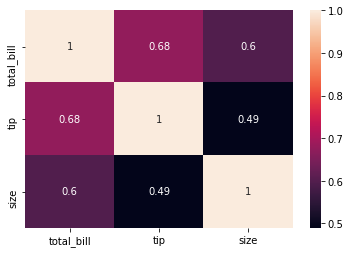

In [77]:
sns.heatmap(tips.corr(), annot=True)

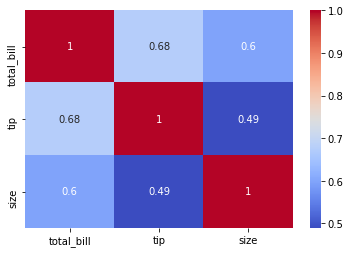

In [78]:
sns.heatmap(tips.corr(), annot=True, cmap='coolwarm')

In [79]:
# making matrix form of dataframe using pivot_table() for a heatmap (matrix plot)

In [80]:
flights.pivot_table(index='month', columns='year', values='passengers')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


In [81]:
flights_matrix = flights.pivot_table(index='month', columns='year', values='passengers')

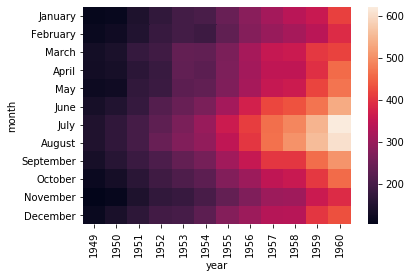

In [82]:
sns.heatmap(flights_matrix)

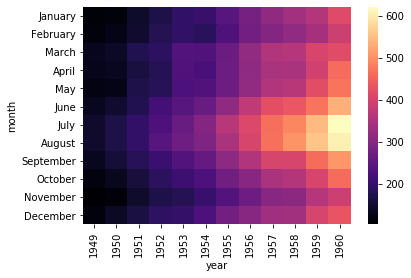

In [83]:
sns.heatmap(flights_matrix, cmap='magma')

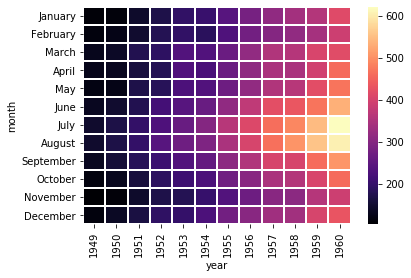

In [84]:
sns.heatmap(flights_matrix, cmap='magma', linecolor='white', linewidths=1)

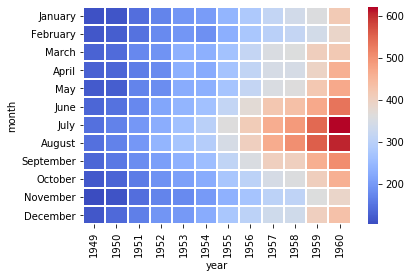

In [85]:
sns.heatmap(flights_matrix, cmap='coolwarm', linecolor='white', linewidths=1)

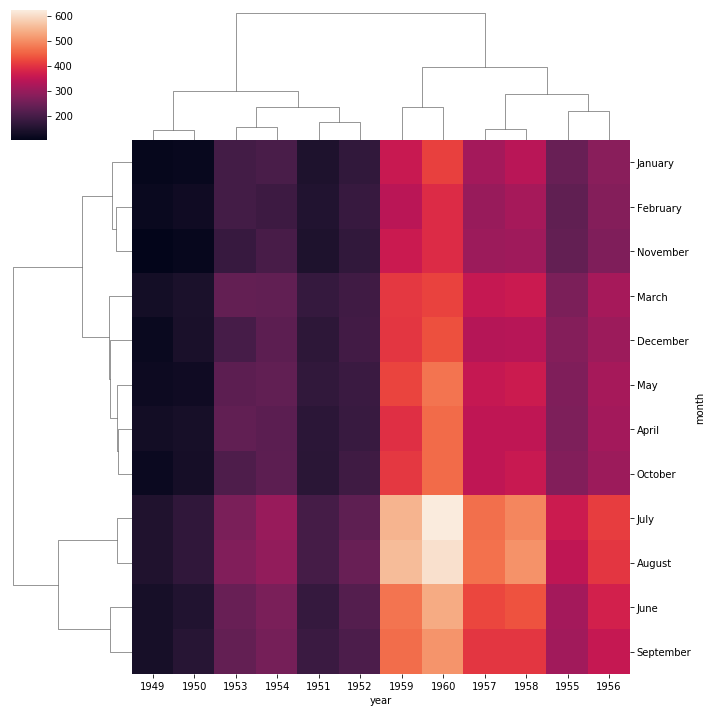

In [87]:
sns.clustermap(flights_matrix)

In [88]:
# grouping based on similarities, out of order both on x and y to group

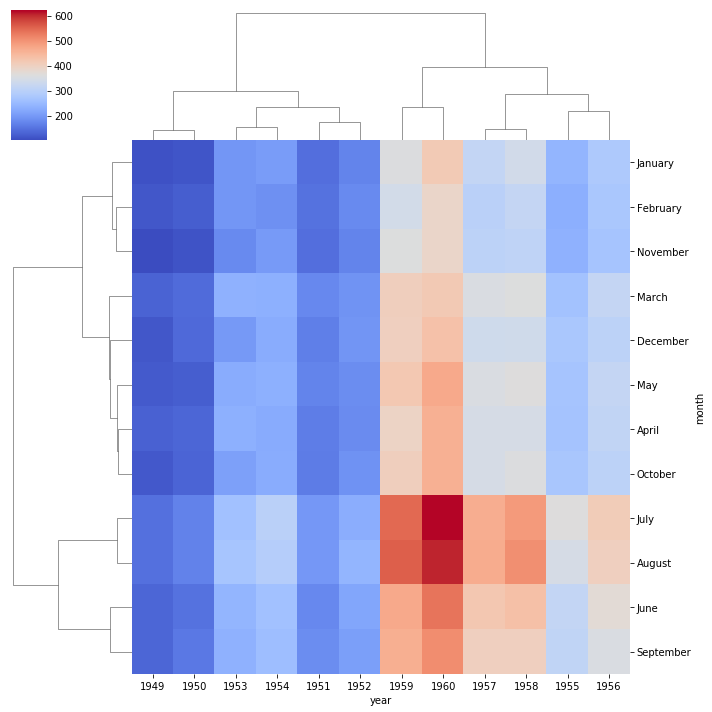

In [89]:
sns.clustermap(flights_matrix, cmap='coolwarm')

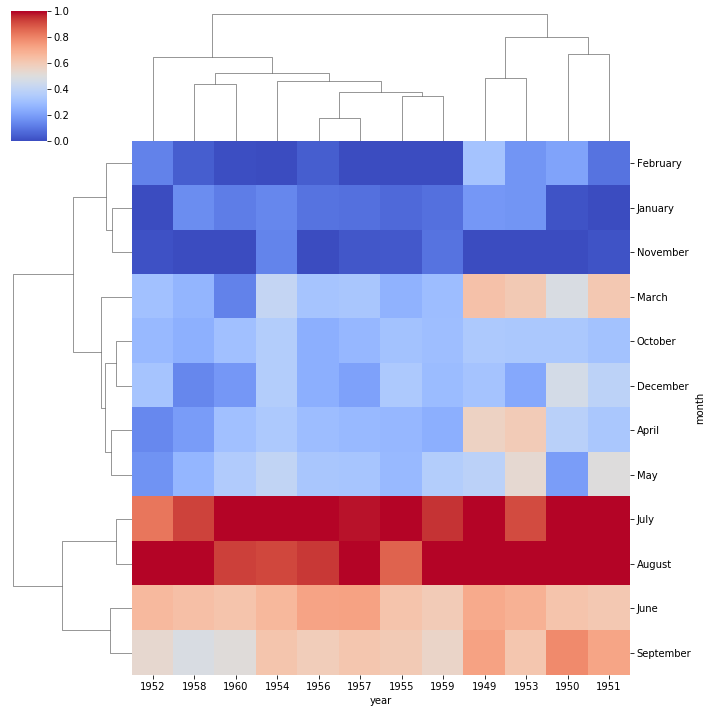

In [90]:
sns.clustermap(flights_matrix, cmap='coolwarm', standard_scale=1)

In [91]:
# normalized scale 0 - 1. Feb, Jan Nove similar in low passengers, Aug, June, Sept similar in high passengers

In [92]:
# SEABORN GRIDS PLOTS

In [93]:
iris = sns.load_dataset('iris')

In [94]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [95]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

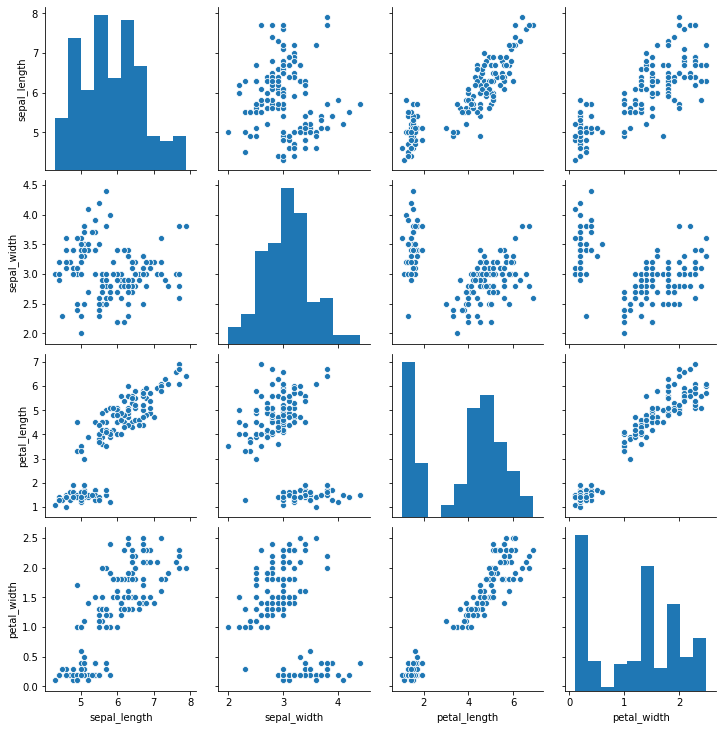

In [97]:
sns.pairplot(iris)

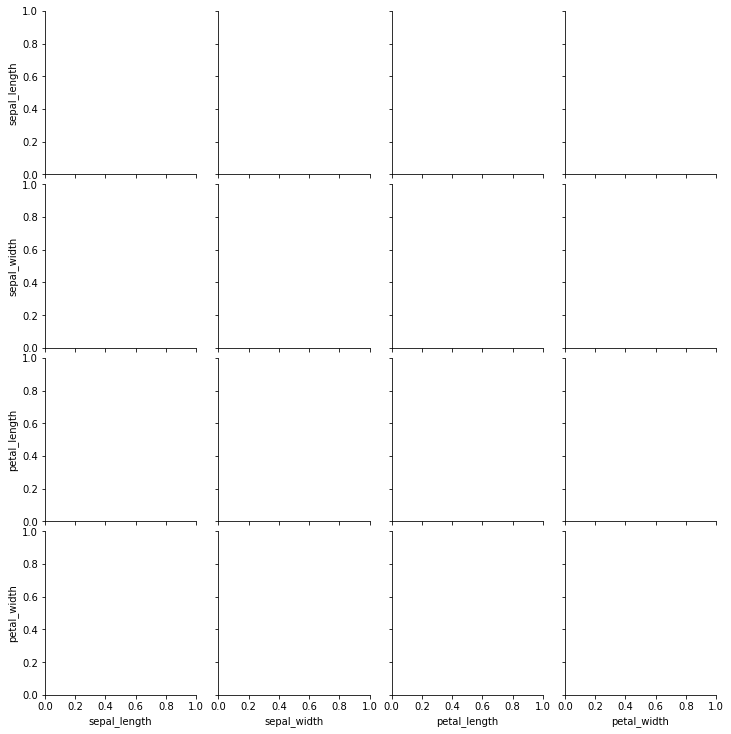

In [98]:
sns.PairGrid(iris)

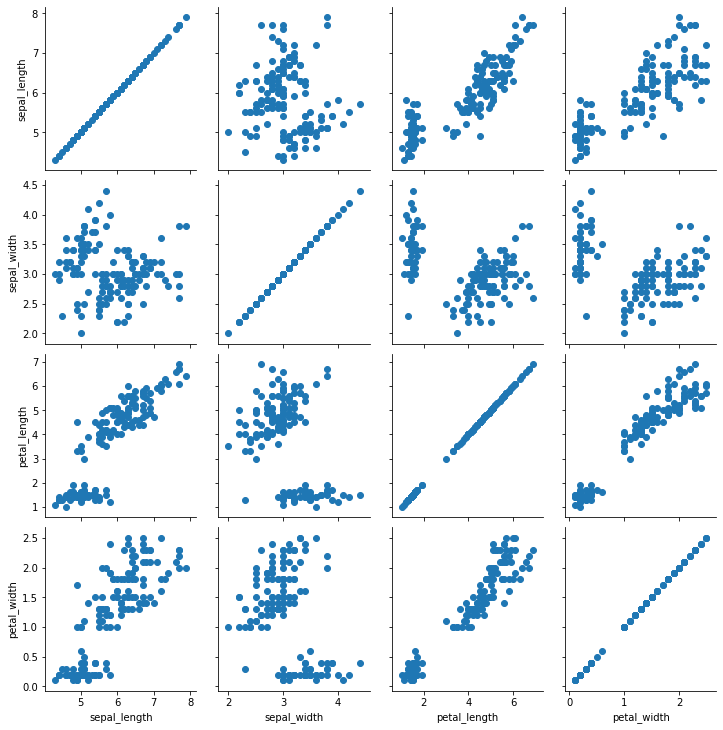

In [103]:
grid = sns.PairGrid(iris)
grid.map(plt.scatter)

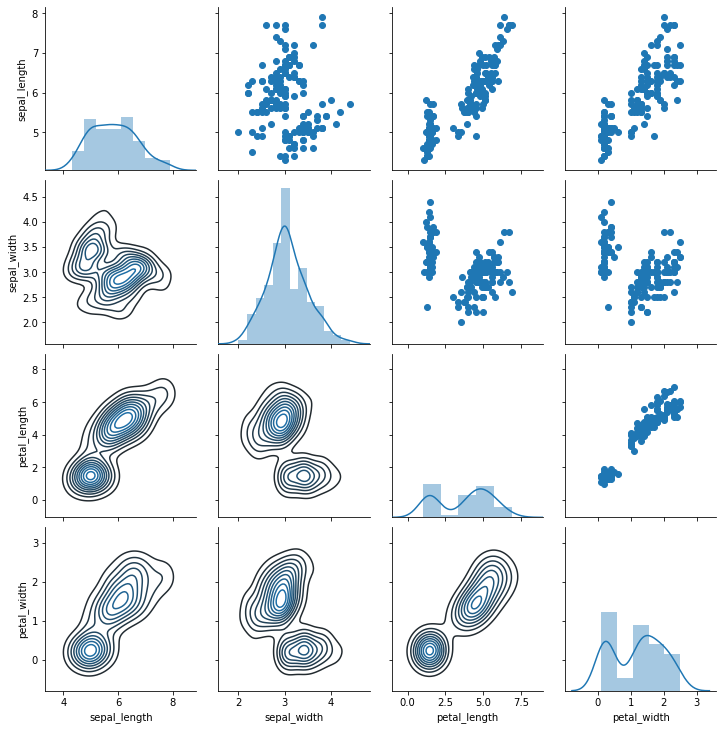

In [107]:
grid = sns.PairGrid(iris)
grid.map_upper(plt.scatter)
grid.map_diag(sns.distplot)
grid.map_lower(sns.kdeplot)

In [108]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


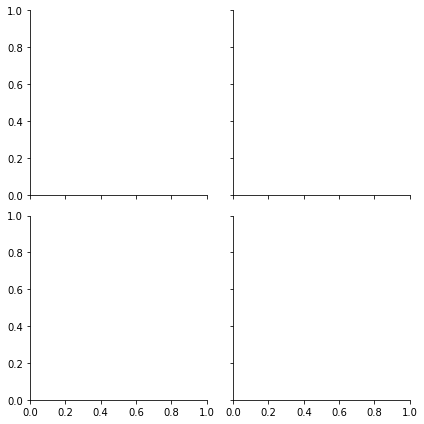

In [109]:
g = sns.FacetGrid(data=tips,col='time',row='smoker')

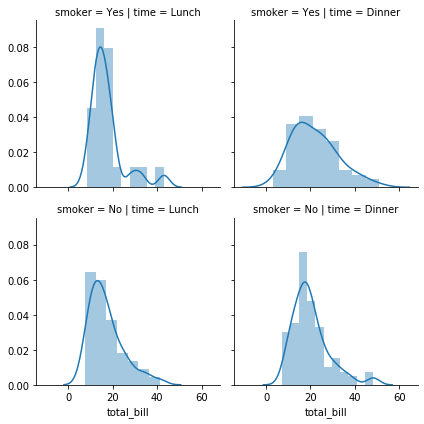

In [110]:
g = sns.FacetGrid(data=tips,col='time',row='smoker')
g.map(sns.distplot,'total_bill')

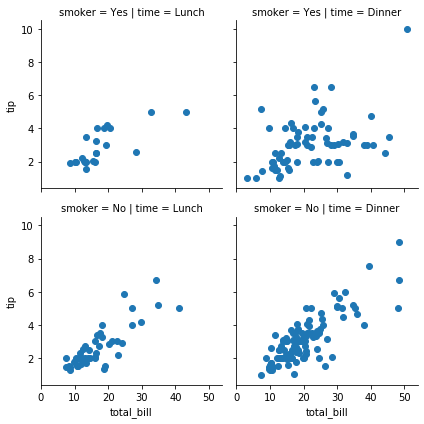

In [111]:
g = sns.FacetGrid(data=tips,col='time',row='smoker')
g.map(plt.scatter,'total_bill','tip')